In [34]:
# There are six factors on the basis of which all countries are ranked: 

# GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption

In [ ]:
# Our goal is to do an exploratory data analysis of the factors that make people happy

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import requests
import io
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('happiness_score_dataset.csv')

In [25]:
df.head(4)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531


In [27]:
df.shape

(158, 12)

In [28]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [30]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
#Observing the distribution of the happiness score data

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

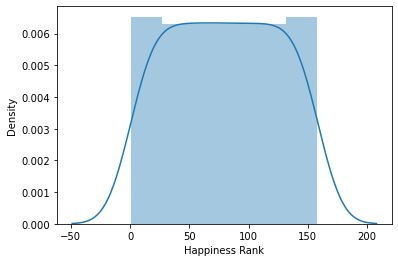

In [44]:
sns.distplot(df['Happiness Rank'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

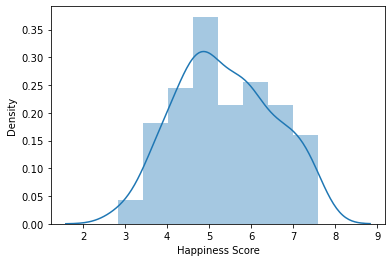

In [37]:
sns.distplot(df['Happiness Score'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

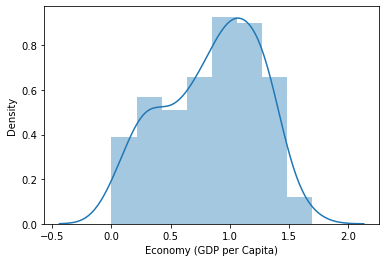

In [38]:
sns.distplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

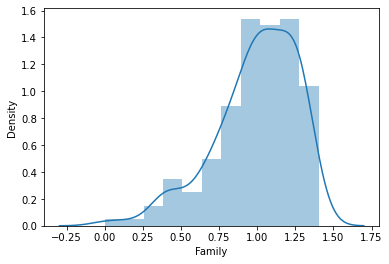

In [39]:
sns.distplot(df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

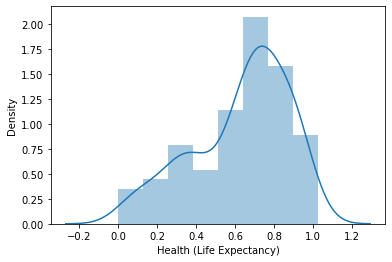

In [40]:
sns.distplot(df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

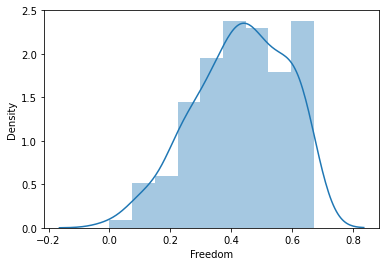

In [41]:
sns.distplot(df['Freedom'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

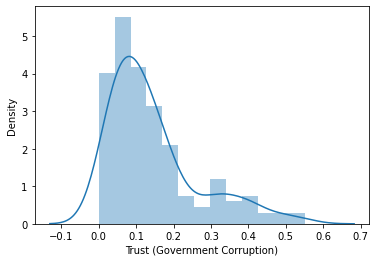

In [42]:
sns.distplot(df['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

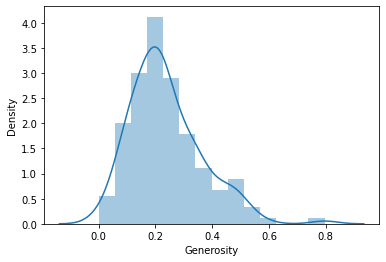

In [45]:
sns.distplot(df['Generosity'])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

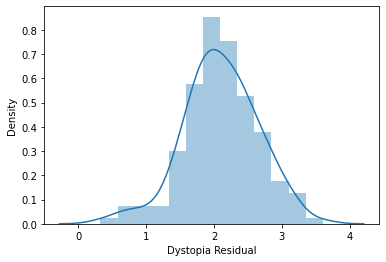

In [46]:
sns.distplot(df['Dystopia Residual'])

In [49]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [56]:
columns = ['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Happiness Score']

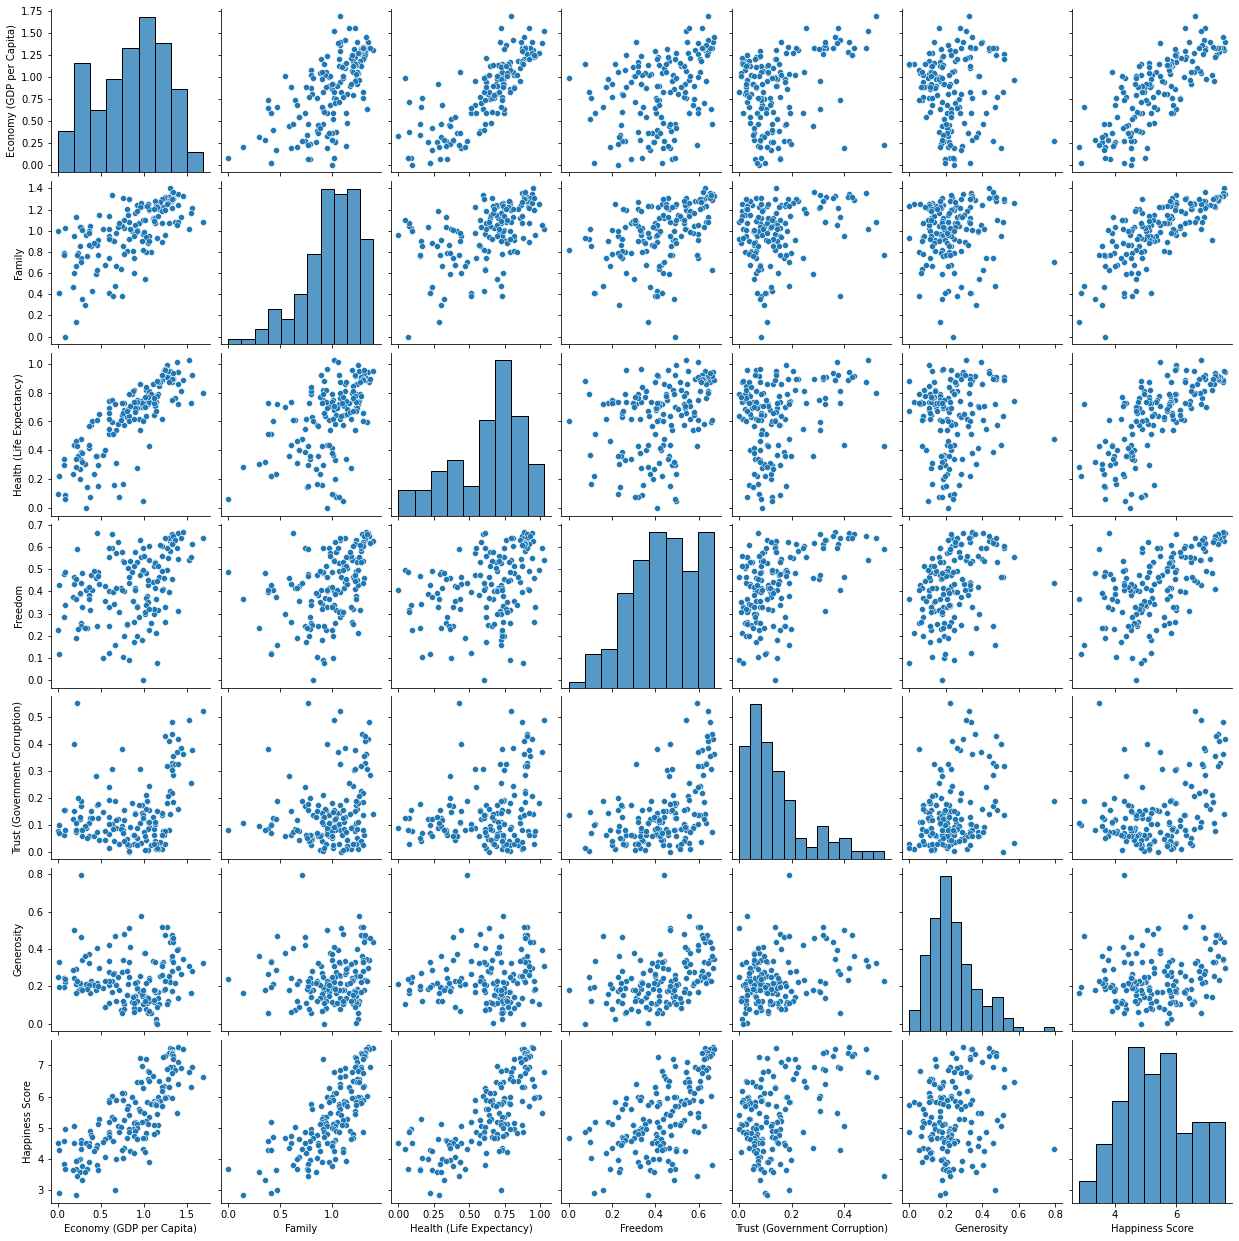

In [57]:
sns.pairplot(df[columns])

In [ ]:
#Economy, Family, Health and Freedom linearly impact happiness score

<AxesSubplot:>

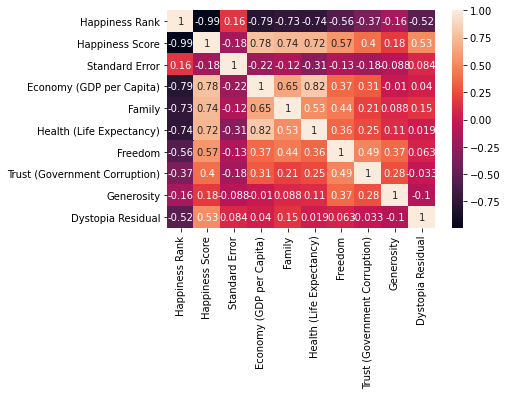

In [59]:
cor = df.corr()
sns.heatmap(cor, annot = True)

In [69]:
#Economy, Family, Health and Freedom are most important factors for happiness 

#Impact of Trust and Generosity on happiness is very minimal

In [ ]:
#Top 3 happy countries

<AxesSubplot:xlabel='Country', ylabel='Happiness Score'>

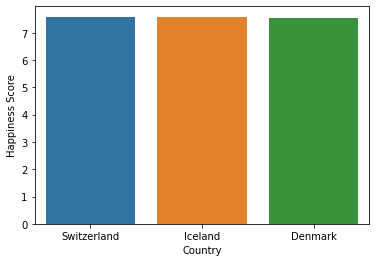

In [77]:
sns.barplot(x = "Country", y = "Happiness Score", data = df.head(3))

In [ ]:
#Top 3 unhappy countries

<AxesSubplot:xlabel='Country', ylabel='Happiness Score'>

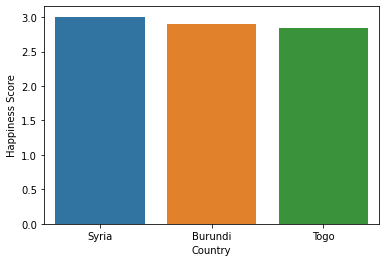

In [78]:
sns.barplot(x = "Country", y = "Happiness Score", data = df.tail(3))

In [ ]:
#Countries listed as per Economy - highest to lowest

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Country'>

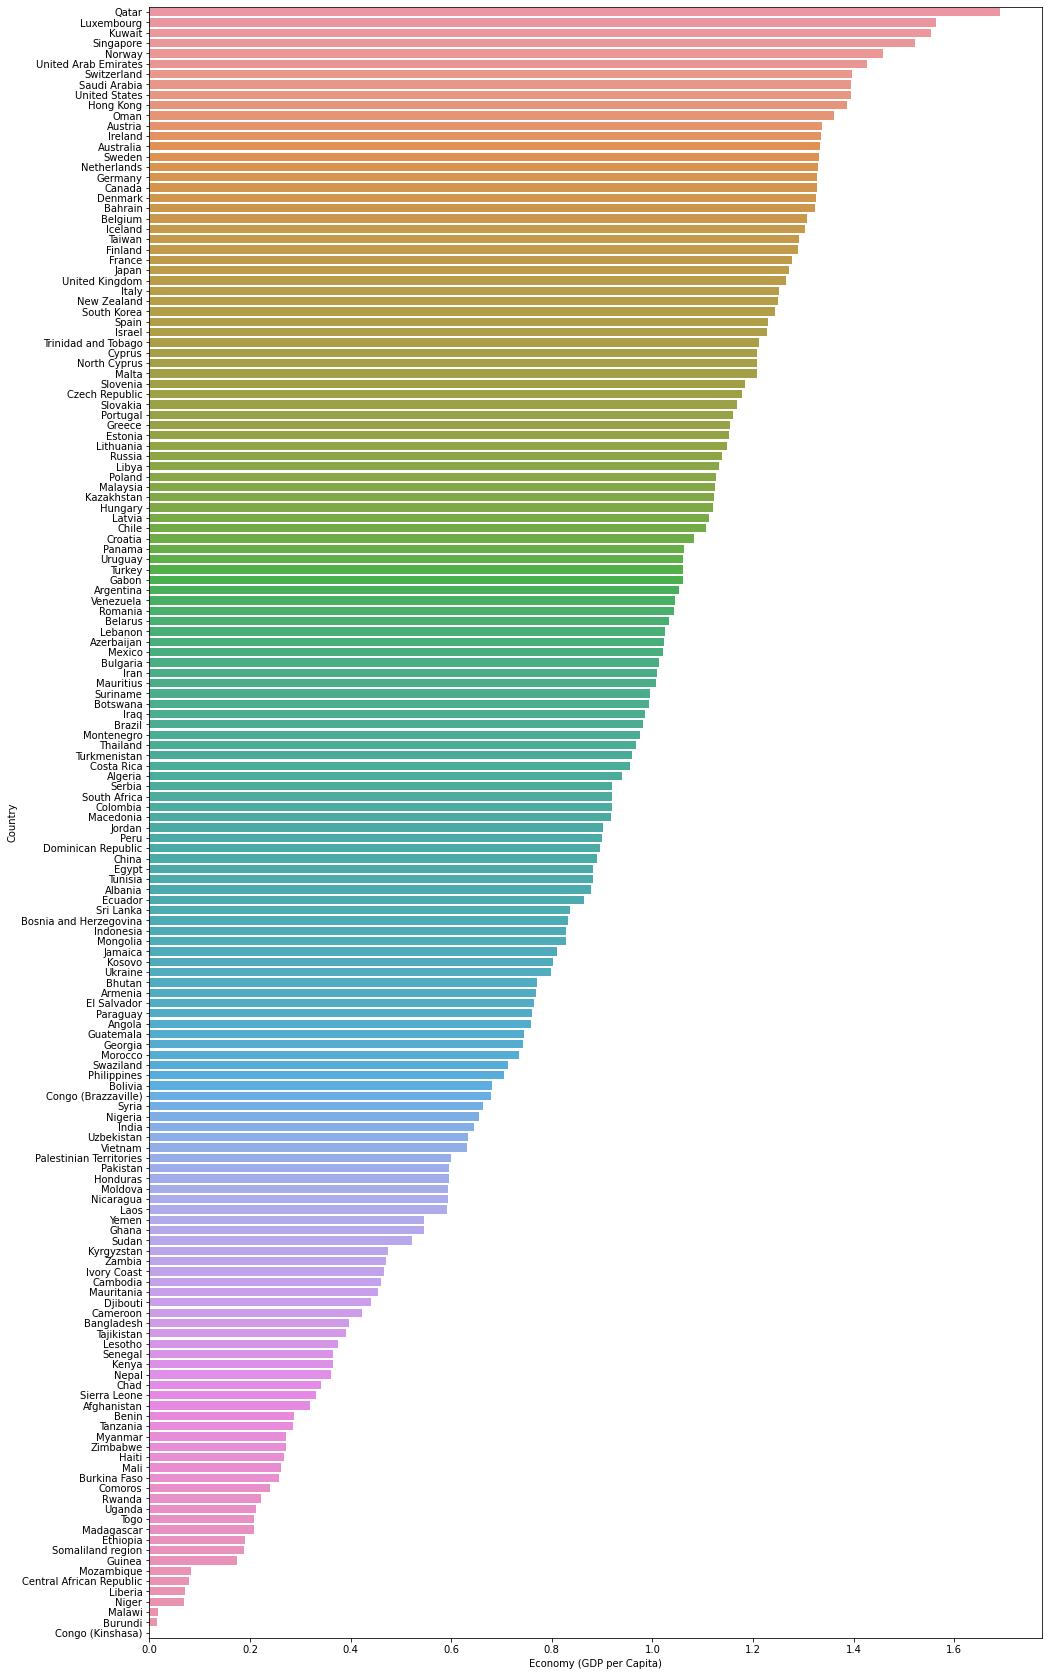

In [92]:
plt.figure(figsize = (16,30))
sns.barplot(x = "Economy (GDP per Capita)", y = "Country", data = df.sort_values(by=['Economy (GDP per Capita)'], ascending = False))

In [ ]:
#Countries listed as per family - highest to lowest

<AxesSubplot:xlabel='Family', ylabel='Country'>

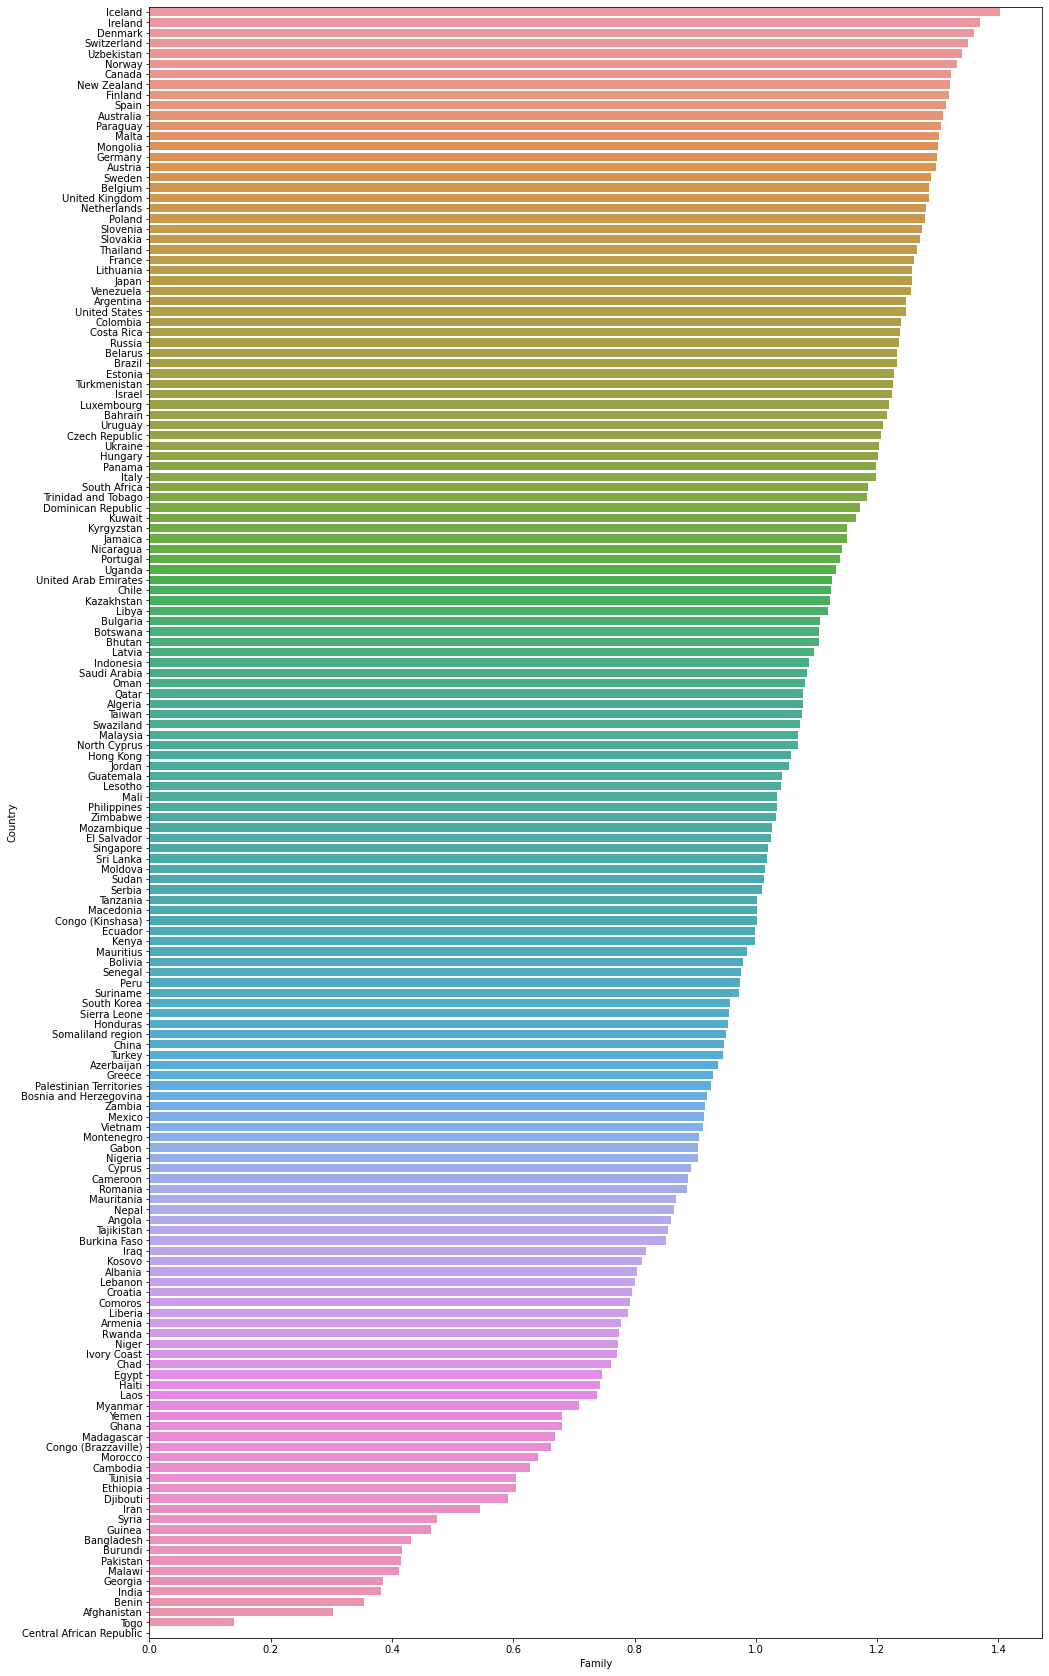

In [94]:
plt.figure(figsize = (16,30))
sns.barplot(x = "Family", y = "Country", data = df.sort_values(by=['Family'], ascending = False))

In [ ]:
#Countries listed as per Health - highest to lowest

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Country'>

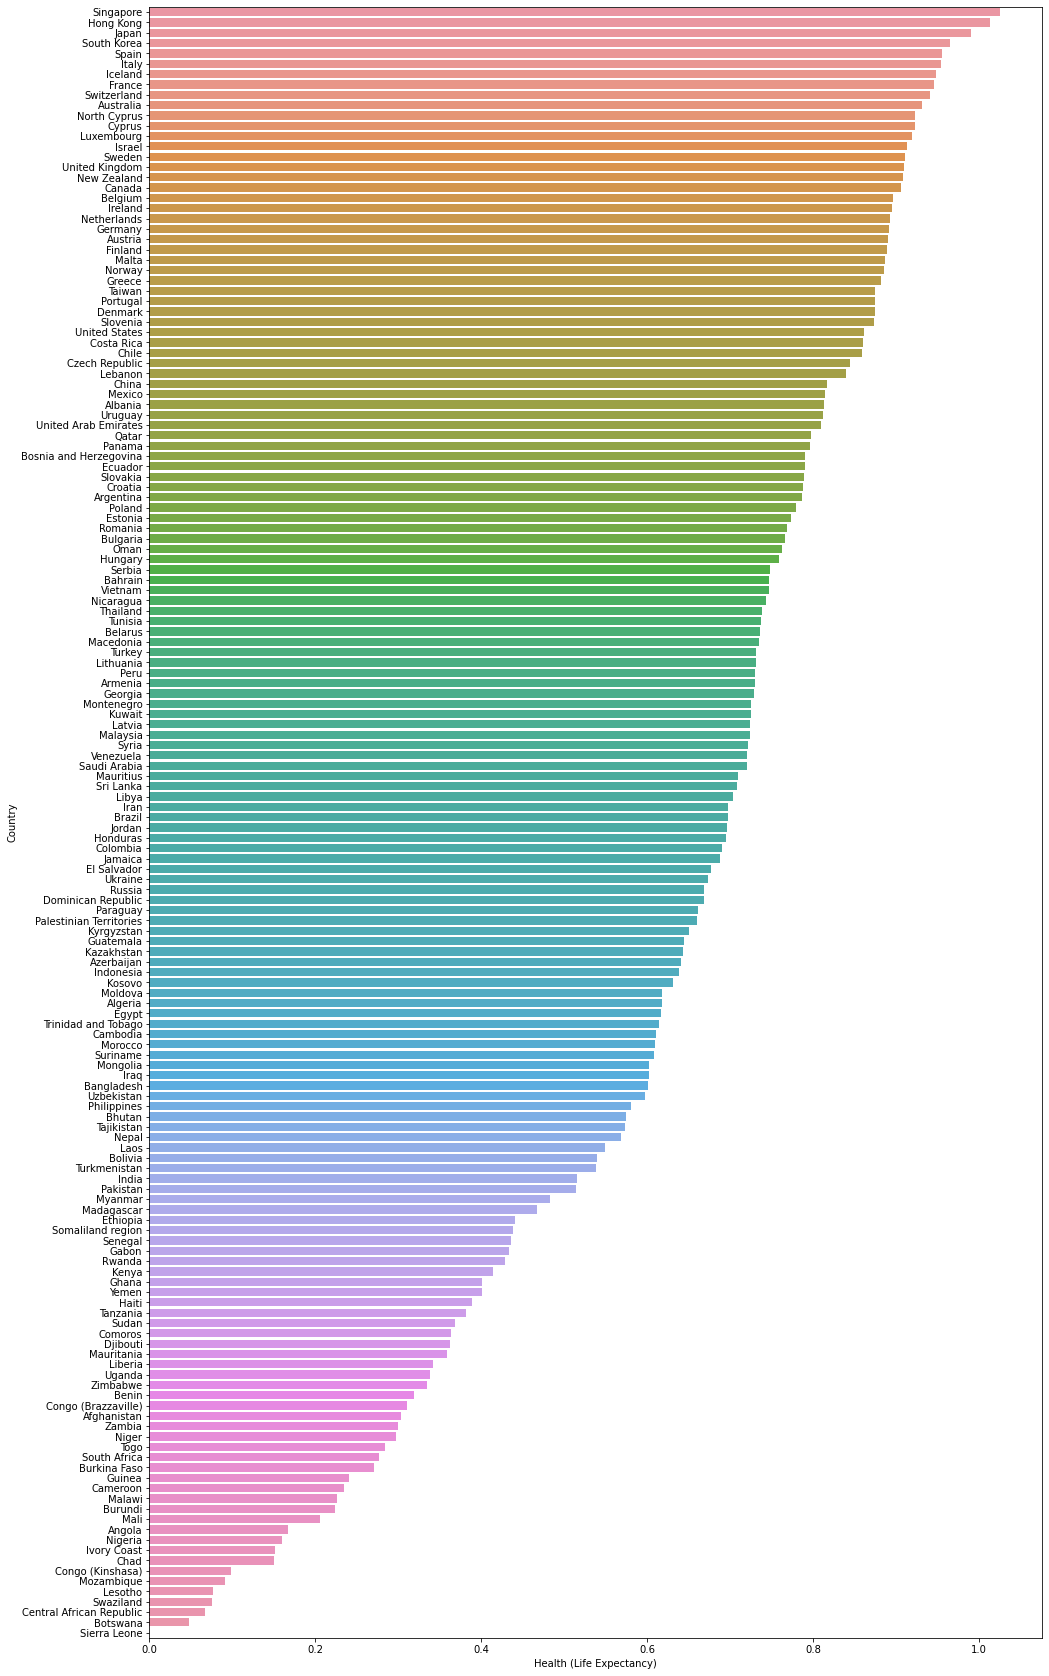

In [96]:
plt.figure(figsize = (16,30))
sns.barplot(x = "Health (Life Expectancy)", y = "Country", data = df.sort_values(by=['Health (Life Expectancy)'], ascending = False))

In [ ]:
#Countries listed as per Freedom - highest to lowest

<AxesSubplot:xlabel='Freedom', ylabel='Country'>

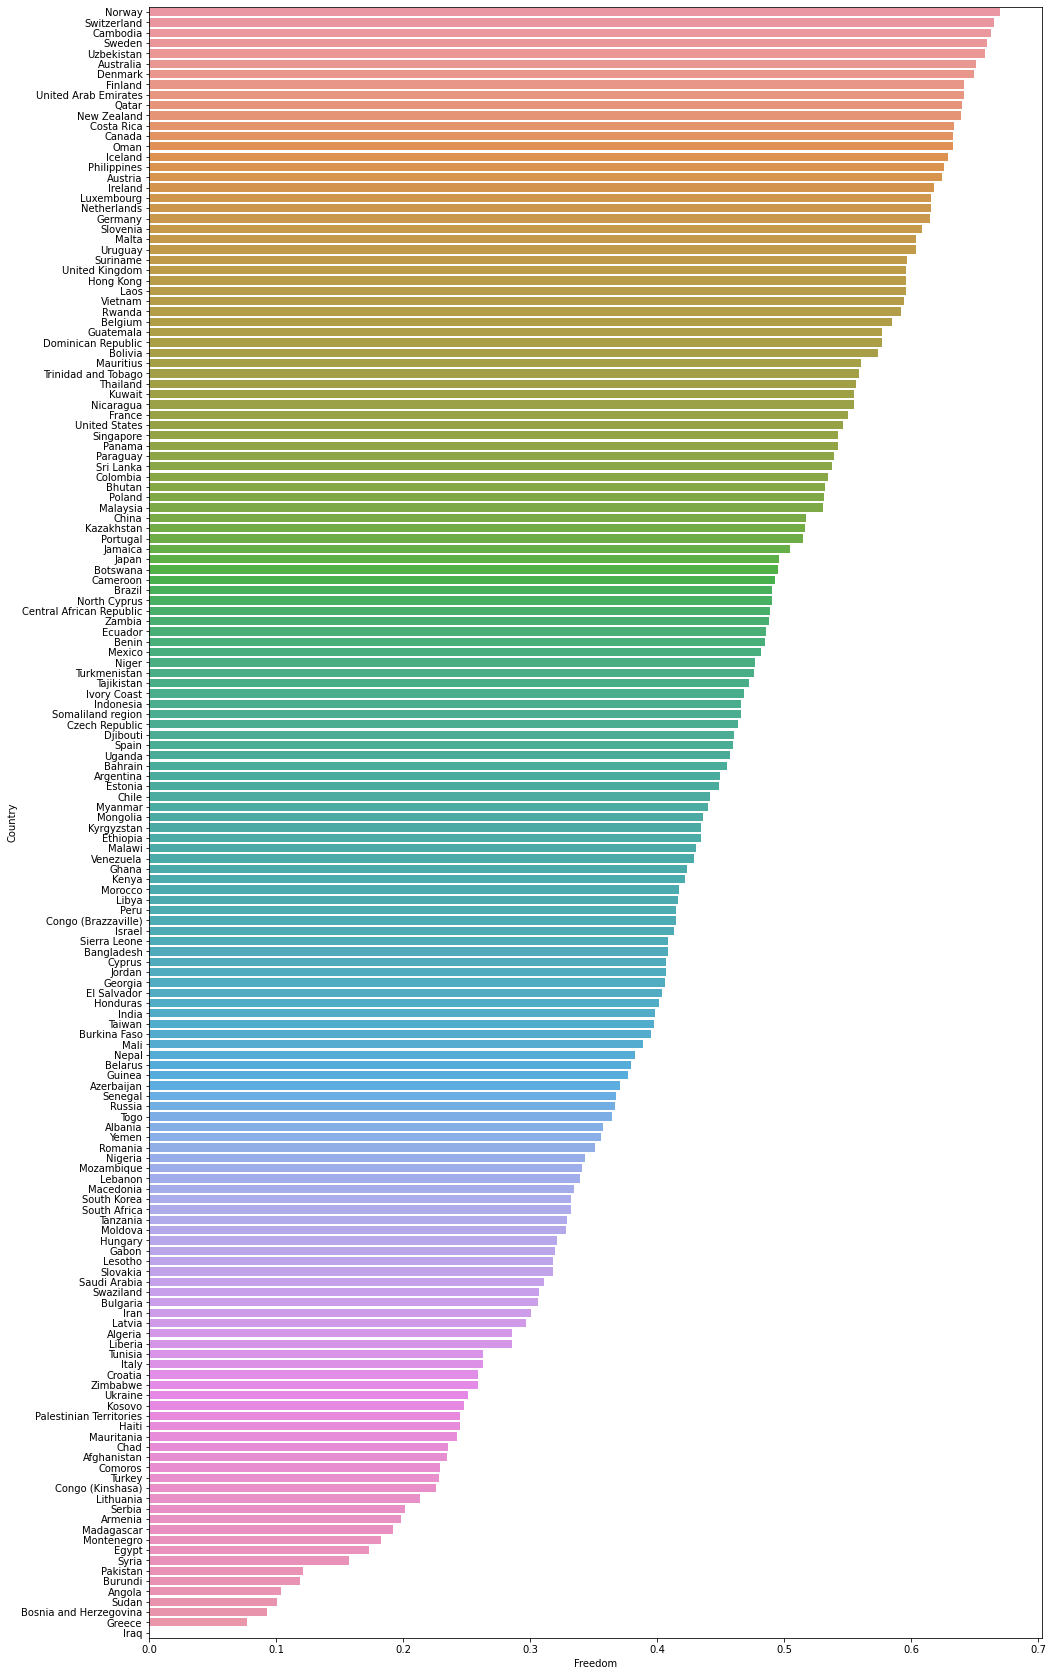

In [97]:
plt.figure(figsize = (16,30))
sns.barplot(x = "Freedom", y = "Country", data = df.sort_values(by=['Freedom'], ascending = False))